# Contents
1. Introduction
2. Examine Data
3. Manipulating Data
4. Preparing Data for Machine Learning
5. Classification Methods
    * Logistic Regression Classification
    * KNN Classification
    * SVM Classification
    * Naive Bayes Classification
    * Decision Tree Classification
    * Random Forest Classification
6. Checking Classification Results with Confusion Matrix
7. Conclusion

# 1. Introduction

This dataset about any mushroom is a safe to eat or deadly poison. I will examine the data and I will create a machine learning algorythm which is detects any mushroom is edible or poisinous due to it's specifications like cap shape-color or gill color-size. Let's examine the data.

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mushrooms.csv']


In [38]:
data = pd.read_csv("../input/mushrooms.csv")

# 2. Examine Data

I import the data and now I will use .head and .info methods to learn more about dataset.

In [39]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [41]:
data["class"].unique()

array(['p', 'e'], dtype=object)

We have a class column which is giving the mushrooms poisinous(p) or edible(e). Also other 22 features has string values too. So we should change the data types to int or float. Also I found about the "veil-type" has just one unique value and it's "p", we should get rid of it. But how can we do that? Let's look on the next section.

# 3. Manipulating Data

We should have a class column as 1 or 0. So we can use below code to change "p" string to 1 and "e" to 0. Also I will get rid of "veil-type" column.

In [42]:
# Changing class values to "1" and "0"s.
data["class"] = [1 if i == "p" else 0 for i in data["class"]]

# Dropping "veil-type" column.
data.drop("veil-type",axis=1,inplace=True)

Now we will change feature column's values to floats. But how can we do that? I think about one way, maybe there is another good approachs but I didn't search for them. Now I will explain how did I manipulate feature datas with one example feature:

* All features values should be between 0 and 1. This is the first point.
* For example, take "ring_number" column. This column has three unique values which are "n", "o" and "t". We can assign 1 and 0 to two of them, and the other one should be between of them. Let's say n = 1, o = 0 and t = 0.5.
* Another example is "cap_surface". This column has four unique values, this values don't matter. We can assing 1 and 0 to two of them again, but other two variable? Now we will say them 0.33 and 0.67.
* From this two example we can derive a mathematical formula. Below code is about that, if you don't understand that, leave a comment about it and I will try to explain it.

In [43]:
for column in data.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(data[column].unique())-1)
    for i in data[column].unique():
        data[column] = [value if letter == i else letter for letter in data[column]]
        value += step

With below section we can check the data, and we will see the all columns has float or integer values now.

In [44]:
data_check = data.head()
data_check = data_check.append(data.tail())
data_check

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
1,0,0.0,0.000000,0.111111,0.0,0.125,0.0,0.0,1.0,0.000000,0.0,0.25,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.166667
2,0,0.2,0.000000,0.222222,0.0,0.250,0.0,0.0,1.0,0.090909,0.0,0.25,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.125,0.2,0.333333
3,1,0.0,0.333333,0.222222,0.0,0.000,0.0,0.0,0.0,0.090909,0.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.00,0.000,0.0,0.000000
4,0,0.0,0.000000,0.333333,1.0,0.375,0.0,1.0,1.0,0.000000,1.0,0.00,0.0,0.0,0.00,0.000,0.000000,0.0,0.25,0.125,0.4,0.166667
8119,0,0.8,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,1.00,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8120,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,1.00,0.0,0.0,0.75,0.875,0.333333,0.0,0.00,1.000,0.6,1.000000
8121,0,0.6,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.090909,0.0,1.00,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,1.000,1.0,1.000000
8122,1,0.8,0.333333,0.000000,1.0,0.750,0.0,0.0,0.0,0.727273,1.0,1.00,0.0,1.0,0.00,0.000,0.000000,0.0,0.25,0.500,0.6,1.000000
8123,0,0.0,0.000000,0.000000,1.0,0.375,1.0,0.0,1.0,0.909091,0.0,1.00,0.0,0.0,0.75,0.875,0.666667,0.0,0.00,0.750,1.0,1.000000


# 4. Preparing Data for Machine Learning

Now we will choose x and y axis and split these datas to train or test.

In [45]:
from sklearn.model_selection import train_test_split
y = data["class"].values    # "class" column as numpy array.
x = data.drop(["class"], axis=1).values    # All data except "class" column. I didn't use normalization because all data has values between 0 and 1.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)    # Split data for train and test.

# 5. Classification Methods

* 5.1. Logistic Regression Classification

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test,y_test)*100,2)))

Test Accuracy: 97.05%


* 5.2. KNN Classification

In [47]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


* 5.3. SVM Classification

In [48]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 97.54%


* 5.4. Naive Bayes Classification

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test,y_test)*100,2)))

Test Accuracy: 92.12%


* 5.5. Decision Tree Classification

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


* 5.6. Random Forest Classification

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))

Test Accuracy: 100.0%


# 6. Checking Classification Results with Confusion Matrix
In this section I will check the results with confusion matrix on Logistic Regression and KNN Classification. Logistic Regression's accuracy was 97.05% and KNN's was 100%.

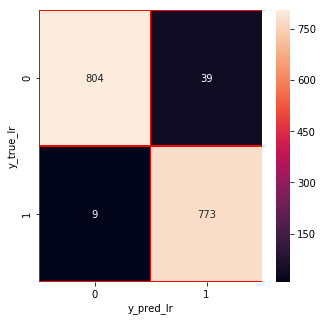

In [52]:
from sklearn.metrics import confusion_matrix
y_pred_lr = lr.predict(x_test)
y_true_lr = y_test
cm = confusion_matrix(y_true_lr, y_pred_lr)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_true_lr")
plt.show()

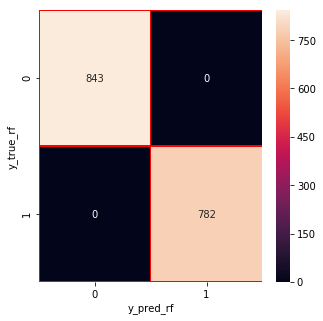

In [53]:
y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

# 7. Conclusion
* With confusion matrix we saw that our train and test datas balanced, so there is no problem in there.
* Most of classfication methods hit 100% accuracy with this dataset.